In [23]:
# Import libraries
import numpy as np
import pandas as pd
import time

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFECV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [24]:
# Read data
data = pd.read_excel("Credit Card Payment Fraud Features.xlsx")

In [25]:
print(data.columns)

Index(['amount', 'cardnum', 'date', 'fraud', 'merch.description',
       'merch.state', 'merch.zip', 'merchnum', 'recordnum', 'transtype',
       'card_frequency_3', 'card_amount_to_avg_3', 'card_amount_to_max_3',
       'card_amount_to_median_3', 'card_amount_to_total_3',
       'card_distinct_state_3', 'card_distinct_zip_3',
       'card_distinct_merchnum_3', 'card_frequency_7', 'card_amount_to_avg_7',
       'card_amount_to_max_7', 'card_amount_to_median_7',
       'card_amount_to_total_7', 'card_distinct_state_7',
       'card_distinct_zip_7', 'card_distinct_merchnum_7', 'card_frequency_14',
       'card_amount_to_avg_14', 'card_amount_to_max_14',
       'card_amount_to_median_14', 'card_amount_to_total_14',
       'card_distinct_state_14', 'card_distinct_zip_14',
       'card_distinct_merchnum_14', 'card_frequency_28',
       'card_amount_to_avg_28', 'card_amount_to_max_28',
       'card_amount_to_median_28', 'card_amount_to_total_28',
       'card_distinct_state_28', 'card_distin

In [26]:
print(data.head(10))

   amount     cardnum       date  fraud       merch.description merch.state  \
0    3.62  5142190439 2010-01-01      0  FEDEX SHP 12/23/09 AB#          TN   
1    3.80  5142148452 2010-01-01      0  FEDEX SHP 12/28/09 AB#          TN   
2  137.45  5142151402 2010-01-01      0      CDW*GOVERNMENT INC          IL   
3    3.62  5142135500 2010-01-01      0  FEDEX SHP 12/22/09 AB#          TN   
4    3.62  5142283088 2010-01-01      0  FEDEX SHP 12/22/09 AB#          TN   
5    3.74  5142148452 2010-01-01      0  FEDEX SHP 12/22/09 AB#          TN   
6  259.80  5142156374 2010-01-01      0  FERGUSON ENTERPRISES I          FL   
7  218.57  5142190596 2010-01-01      0          FISHER SCI HUS          TX   
8    3.67  5142125684 2010-01-01      0  FEDEX SHP 12/22/09 AB#          TN   
9    3.67  5142190439 2010-01-01      0  FEDEX SHP 12/22/09 AB#          TN   

  merch.zip       merchnum  recordnum transtype  ...  \
0     38118  5509006296254          1         P  ...   
1     38118  55090

In [27]:
data = data.sort_values(by=['date'])

In [28]:
data_mdl = data[['card_frequency_3', 'card_amount_to_avg_3', 'card_amount_to_max_3',\
                 'card_amount_to_median_3', 'card_amount_to_total_3',\
                 'card_distinct_state_3', 'card_distinct_zip_3',\
                 'card_distinct_merchnum_3', 'card_frequency_7', 'card_amount_to_avg_7',\
                 'card_amount_to_max_7', 'card_amount_to_median_7',\
                 'card_amount_to_total_7', 'card_distinct_state_7',\
                 'card_distinct_zip_7', 'card_distinct_merchnum_7', 'card_frequency_14',\
                 'card_amount_to_avg_14', 'card_amount_to_max_14',\
                 'card_amount_to_median_14', 'card_amount_to_total_14',\
                 'card_distinct_state_14', 'card_distinct_zip_14',\
                 'card_distinct_merchnum_14', 'card_frequency_28',\
                 'card_amount_to_avg_28', 'card_amount_to_max_28',\
                 'card_amount_to_median_28', 'card_amount_to_total_28',\
                 'card_distinct_state_28', 'card_distinct_zip_28',\
                 'card_distinct_merchnum_28', 'merchant_frequency_3',\
                 'merchant_amount_to_avg_3', 'merchant_amount_to_max_3',\
                 'merchant_amount_to_median_3', 'merchant_amount_to_total_3',\
                 'merchant_distinct_state_3', 'merchant_distinct_zip_3',\
                 'merchant_distinct_cardnum_3', 'merchant_frequency_7',\
                 'merchant_amount_to_avg_7', 'merchant_amount_to_max_7',\
                 'merchant_amount_to_median_7', 'merchant_amount_to_total_7',\
                 'merchant_distinct_state_7', 'merchant_distinct_zip_7',\
                 'merchant_distinct_cardnum_7', 'merchant_frequency_14',\
                 'merchant_amount_to_avg_14', 'merchant_amount_to_max_14',\
                 'merchant_amount_to_median_14', 'merchant_amount_to_total_14',\
                 'merchant_distinct_state_14', 'merchant_distinct_zip_14',\
                 'merchant_distinct_cardnum_14', 'merchant_frequency_28',\
                 'merchant_amount_to_avg_28', 'merchant_amount_to_max_28',\
                 'merchant_amount_to_median_28', 'merchant_amount_to_total_28',\
                 'merchant_distinct_state_28', 'merchant_distinct_zip_28',\
                 'merchant_distinct_cardnum_28','fraud']]

In [29]:
labels = data_mdl[['fraud']]
features = data_mdl.loc[:, data_mdl.columns !='fraud'] 

In [30]:
# Data Normalization by z-scaling
features = pd.DataFrame(scale(features))

In [31]:
features.columns = ['card_frequency_3', 'card_amount_to_avg_3', 'card_amount_to_max_3',\
                 'card_amount_to_median_3', 'card_amount_to_total_3',\
                 'card_distinct_state_3', 'card_distinct_zip_3',\
                 'card_distinct_merchnum_3', 'card_frequency_7', 'card_amount_to_avg_7',\
                 'card_amount_to_max_7', 'card_amount_to_median_7',\
                 'card_amount_to_total_7', 'card_distinct_state_7',\
                 'card_distinct_zip_7', 'card_distinct_merchnum_7', 'card_frequency_14',\
                 'card_amount_to_avg_14', 'card_amount_to_max_14',\
                 'card_amount_to_median_14', 'card_amount_to_total_14',\
                 'card_distinct_state_14', 'card_distinct_zip_14',\
                 'card_distinct_merchnum_14', 'card_frequency_28',\
                 'card_amount_to_avg_28', 'card_amount_to_max_28',\
                 'card_amount_to_median_28', 'card_amount_to_total_28',\
                 'card_distinct_state_28', 'card_distinct_zip_28',\
                 'card_distinct_merchnum_28', 'merchant_frequency_3',\
                 'merchant_amount_to_avg_3', 'merchant_amount_to_max_3',\
                 'merchant_amount_to_median_3', 'merchant_amount_to_total_3',\
                 'merchant_distinct_state_3', 'merchant_distinct_zip_3',\
                 'merchant_distinct_cardnum_3', 'merchant_frequency_7',\
                 'merchant_amount_to_avg_7', 'merchant_amount_to_max_7',\
                 'merchant_amount_to_median_7', 'merchant_amount_to_total_7',\
                 'merchant_distinct_state_7', 'merchant_distinct_zip_7',\
                 'merchant_distinct_cardnum_7', 'merchant_frequency_14',\
                 'merchant_amount_to_avg_14', 'merchant_amount_to_max_14',\
                 'merchant_amount_to_median_14', 'merchant_amount_to_total_14',\
                 'merchant_distinct_state_14', 'merchant_distinct_zip_14',\
                 'merchant_distinct_cardnum_14', 'merchant_frequency_28',\
                 'merchant_amount_to_avg_28', 'merchant_amount_to_max_28',\
                 'merchant_amount_to_median_28', 'merchant_amount_to_total_28',\
                 'merchant_distinct_state_28', 'merchant_distinct_zip_28',\
                 'merchant_distinct_cardnum_28']

In [32]:
print(features.head(10))

   card_frequency_3  card_amount_to_avg_3  card_amount_to_max_3  \
0          0.310225             -0.105531             -0.121042   
1          0.310225             -0.105531             -0.121042   
2          0.310225             -0.105531             -0.121042   
3         -0.337600             -0.105531             -0.121042   
4         -0.337600             -0.105531             -0.121042   
5         -0.272818             -0.105531             -0.121042   
6          0.051095             -0.105531             -0.121042   
7          0.310225             -0.105531             -0.121042   
8         -0.337600             -0.105531             -0.121042   
9          0.051095             -0.105531             -0.121042   

   card_amount_to_median_3  card_amount_to_total_3  card_distinct_state_3  \
0                -0.119503               -0.118619              -0.773176   
1                -0.119503               -0.118619              -0.773176   
2                -0.119503     

In [33]:
# Train - Test Split (70% train, 30% test)
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.3, random_state=10)


In [34]:
## Check on the distribution to ensure randomization
print(sum(label_train["fraud"]) / len(label_train))
print(sum(label_test["fraud"]) / len(label_test))

0.003155569580309246
0.0030854458118579294


In [35]:
# Feature Selection Function
def feature_selection(model):
    
    clf_rfe = RFECV(model , scoring='roc_auc')
    clf_rfe = clf_rfe.fit(feature_train, label_train)
    
    features_num = clf_rfe.n_features_
    score = clf_rfe.grid_scores_[features_num-1] 
    
    features = np.array(feature_train.columns.to_list())
    features_final = features[clf_rfe.support_].tolist()

    ## print(features_num)
    ## print(score)
    
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("ROC AUC CV score")
    plt.plot(range(1, len(clf_rfe.grid_scores_) + 1), clf_rfe.grid_scores_)
    plt.show()
     
    return features_final


In [36]:
# Model Performance Evaluation function
def model_evaluation_org(model):
    ## Train
    clf = model
    start_train = time.time()
    clf.fit(feature_train, label_train)
    prediction_train = clf.predict(feature_train) 
    end_train = time.time()
    
    auc_train = roc_auc_score(label_train, prediction_train)
    matrix_train = confusion_matrix(label_train, prediction_train)
    accuracy_train = (matrix_train[1,1] + matrix_train[0,0])/len(label_train)
    recall_train = matrix_train[1,1]/(matrix_train[1,1] + matrix_train[1,0]) 
    fp_train = matrix_train[0,1]/(matrix_train[0,1] + matrix_train[0,0])
    time_train = end_train - start_train
       
     ## Test
    start_test = time.time()
    prediction_test = clf.predict(feature_test) 
    end_test = time.time()
    
    auc_test = roc_auc_score(label_test, prediction_test)
    matrix_test = confusion_matrix(label_test, prediction_test)
    accuracy_test = (matrix_test[1,1] + matrix_test[0,0])/len(label_test)
    recall_test = matrix_test[1,1]/(matrix_test[1,1] + matrix_test[1,0]) 
    fp_test = matrix_test[0,1]/(matrix_test[0,1] + matrix_test[0,0])
    time_test = end_test - start_test
    
    
    model_evaluation = pd.DataFrame({"auc": [round(auc_train,4), round(auc_test,4)],
                                     "accuracy": [round(accuracy_train,4), round(accuracy_test,4)],
                                     "true_fdr": [round(recall_train,4), round(recall_test,4)],
                                     "false_fdr": [round(fp_train,4), round(fp_test,4)],
                                     "time": [round(time_train,4), round(time_test,4)]},\
                                     index = ["Train","Test"])    
    return model_evaluation



In [37]:
# Modeling by different machine learning algorithms
###################################### Without Feature Selection & Threshold Adjustment ###################################### 
## Naive Bayes
clf_NB = GaussianNB()                                                                                                                            
NB_evaluation = model_evaluation_org(clf_NB)
NB_evaluation["Model"] = 'Naive Bayes'
        

## Logistic Regression
clf_LR = LogisticRegression()                                                                                                                        
LR_evaluation = model_evaluation_org(clf_LR)
LR_evaluation["Model"] = 'Logistic Regression'  


## Decision Tree
clf_DT = DecisionTreeClassifier()                                                                                                                           
DT_evaluation = model_evaluation_org(clf_DT)
DT_evaluation["Model"] = 'Decision Tree'


## Random Forest
clf_RF = RandomForestClassifier()                                                                                                                         
RF_evaluation = model_evaluation_org(clf_RF)
RF_evaluation["Model"] = 'Random Forest'

## Boosting Tree
clf_BT = AdaBoostClassifier()                                                                                                                      
BT_evaluation = model_evaluation_org(clf_BT)
BT_evaluation["Model"] = 'Ada Boosting Tree'


## XGboost
clf_XGB = XGBClassifier()                                                                                                                         
XGB_evaluation = model_evaluation_org(clf_XGB)
XGB_evaluation["Model"] = 'XGBoost'


## SVM
clf_SVC = SVC()                                                                                                                      
SVC_evaluation = model_evaluation_org(clf_SVC)
SVC_evaluation["Model"] = 'SVM'


## ANN
clf_NN = MLPClassifier()                                                                                                                        
NN_evaluation = model_evaluation_org(clf_NN)
NN_evaluation["Model"] = 'Neural Network'



evaluation_org = pd.concat([NB_evaluation, LR_evaluation, DT_evaluation, 
                                 RF_evaluation, BT_evaluation, XGB_evaluation,
                                 SVC_evaluation, NN_evaluation])


evaluation_test_org = evaluation_org.loc[evaluation_org.index == 'Test',:]


/Users/lichong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lichong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lichong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [38]:
evaluation_org

,auc,accuracy,true_fdr,false_fdr,time,Model
Train,0.7700,0.8916,0.6476,0.1076,0.1651,Naive Bayes
Test,0.7421,0.8924,0.5909,0.1066,0.0344,Naive Bayes
Train,0.6427,0.9975,0.2857,0.0002,0.6332,Logistic Regression
Test,0.5736,0.9968,0.1477,0.0006,0.0028,Logistic Regression
Train,0.9952,1.0000,0.9905,0.0000,4.0474,Decision Tree
Test,0.8234,0.9980,0.6477,0.0009,0.0100,Decision Tree
Train,0.9952,1.0000,0.9905,0.0000,27.3581,Random Forest
Test,0.8011,0.9987,0.6023,0.0001,0.2773,Random Forest
Train,0.8047,0.9986,0.6095,0.0001,14.8497,Gradient Boosting Tree
Test,0.7498,0.9980,0.5000,0.0004,0.2957,Gradient Boosting Tree


In [41]:
evaluation_org.loc[evaluation_org.index == 'Train',:]

,auc,accuracy,true_fdr,false_fdr,time,Model
Train,0.7700,0.8916,0.6476,0.1076,0.1651,Naive Bayes
Train,0.6427,0.9975,0.2857,0.0002,0.6332,Logistic Regression
Train,0.9952,1.0000,0.9905,0.0000,4.0474,Decision Tree
Train,0.9952,1.0000,0.9905,0.0000,27.3581,Random Forest
Train,0.8047,0.9986,0.6095,0.0001,14.8497,Gradient Boosting Tree
Train,0.9952,1.0000,0.9905,0.0000,22.2277,XGBoost
Train,0.7071,0.9982,0.4143,0.0000,22.7901,SVM
Train,0.8952,0.9993,0.7905,0.0000,13.8594,Neural Network


In [39]:
evaluation_test_org

,auc,accuracy,true_fdr,false_fdr,time,Model
Test,0.7421,0.8924,0.5909,0.1066,0.0344,Naive Bayes
Test,0.5736,0.9968,0.1477,0.0006,0.0028,Logistic Regression
Test,0.8234,0.9980,0.6477,0.0009,0.0100,Decision Tree
Test,0.8011,0.9987,0.6023,0.0001,0.2773,Random Forest
Test,0.7498,0.9980,0.5000,0.0004,0.2957,Gradient Boosting Tree
Test,0.8522,0.9989,0.7045,0.0002,0.0540,XGBoost
Test,0.6477,0.9978,0.2955,0.0000,6.3998,SVM
Test,0.8238,0.9987,0.6477,0.0002,0.0225,Neural Network


In [42]:
print("By comparing how those eight machine learning perform on predicting frauds in test data, I found that XGBoost leads to better results (high ROC-AUC score, Accuracy, True Fraud Detection Rate and low False Fraud Detection Rate) than  all other models. Furthermore, XGBoost outperforms others in this fraud detection use case from business interpretation perspectives. Counter my previous experience, XGBoost has a bit poorer computational performance than Neutral Network in training models and test performance, which might be due to the fact that I didn't put too much effort in fine tuning parameters (simply used default setting) in the models.")

By comparing how those eight machine learning perform on predicting frauds in test data, I found that XGBoost leads to better results (high ROC-AUC score, Accuracy, True Fraud Detection Rate and low False Fraud Detection Rate) than  all other models. Furthermore, XGBoost outperforms others in this fraud detection use case from business interpretation perspectives. Counter my previous experience, XGBoost has a bit poorer computational performance than Neutral Network in training models and test performance, which might be due to the fact that I didn't put too much effort in fine tuning parameters (simply used default setting) in the models.


In [19]:
# Insights

/Users/lichong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


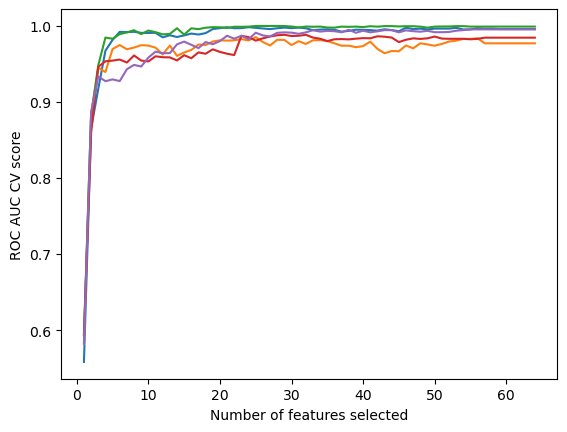

['card_frequency_3',
 'card_amount_to_avg_3',
 'card_distinct_zip_3',
 'card_frequency_7',
 'card_amount_to_avg_7',
 'card_amount_to_max_7',
 'card_amount_to_median_7',
 'card_amount_to_avg_14',
 'card_distinct_merchnum_14',
 'card_frequency_28',
 'card_amount_to_avg_28',
 'card_amount_to_median_28',
 'card_distinct_merchnum_28',
 'merchant_frequency_3',
 'merchant_amount_to_avg_3',
 'merchant_amount_to_median_3',
 'merchant_amount_to_total_3',
 'merchant_distinct_zip_3',
 'merchant_distinct_cardnum_3',
 'merchant_frequency_7',
 'merchant_amount_to_median_7',
 'merchant_distinct_zip_7',
 'merchant_distinct_cardnum_7',
 'merchant_frequency_14',
 'merchant_distinct_cardnum_14',
 'merchant_frequency_28',
 'merchant_amount_to_avg_28',
 'merchant_amount_to_median_28',
 'merchant_distinct_cardnum_28']

In [51]:
## feature selection in predicting fraud
feature_selection(clf_XGB)

In [49]:
feature_importance = pd.DataFrame()
feature_importance["Features"] = features.columns
feature_importance["Importance"] = (clf_XGB.feature_importances_).tolist()
feature_importance = feature_importance.sort_values(by = ["Importance"], ascending = False)
feature_importance = feature_importance.reset_index(drop = True)

feature_importance_sub = feature_importance.loc[feature_importance.index<10,:]

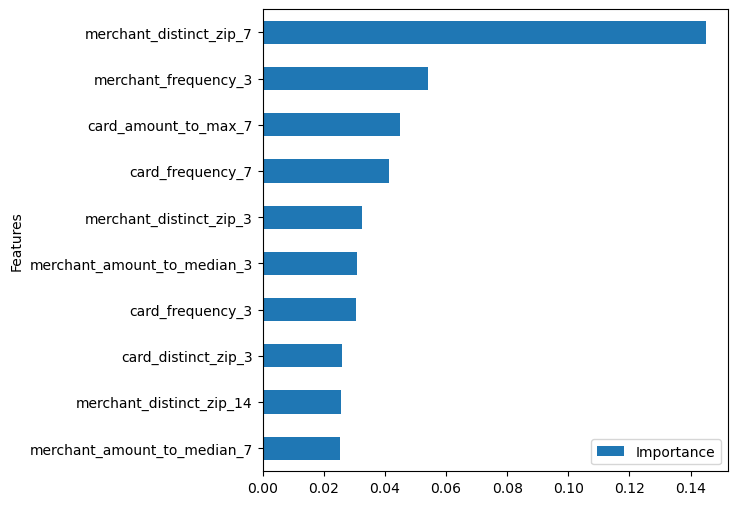

In [50]:
p = feature_importance_sub.plot(kind='barh',x='Features', y='Importance',\
                            figsize = (6,6))
plt.gca().invert_yaxis()
plt.show()

## fig = p.get_figure()
## fig.savefig('feature importance plot.png',bbox_inches = 'tight')

In [67]:
data.groupby(['fraud'])['amount'].mean()

fraud
0     377.376854
1    1524.864866
Name: amount, dtype: float64

In [69]:
print("The average transaction amount of fraud records is: $1524")
print("The average transaction amount of non-fraud records is: $377")

The average transaction amount of fraud records is: $1524
The average transaction amount of non-fraud records is: $377


In [ ]:
# Assume in the next few years, there’ll be same number of transactions ,fraud rate and spending amount as of year 2010:

# ~ 95000 transactions per year
# 0.3% fraud rate
# Average transaction amount of fraud/non-fraud:
# Non-Fraud: $377/transaction
# Fraud: $1524/transaction
# Expected business value (ROI) = Fraud Savings - Loss Sales
# = transactions per year * fraud rate * True Fraud Detection Rate * fraud transaction amount 
# + transactions per year * non-fraud rate * False Fraud Detection Rate * non-fraud transaction amount 


In [71]:
expected_business_value_XGB = 95000*0.003*0.7045*1524 + 95000*0.997*0.0002*377
expected_business_value_XGB

313134.04099999997

In [73]:
print("The Expected Business Value (ROI) of leveraging our XGBoost model in detecting fraudulent credit card payment is 313K.")

The Expected Business Value (ROI) of leveraging our XGBoost model in detecting fraudulent credit card payment is 313K.
